# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Tobigs/Week2/Week2_Optimization/assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [4]:
data.iloc[:, 1:]

,bias,experience,salary
0,1,0.7,48000
1,1,1.9,48000
2,1,2.5,60000
3,1,4.2,63000
4,1,6.0,76000
...,...,...,...
195,1,6.5,84000
196,1,6.9,73000
197,1,5.1,72000
198,1,9.1,69000


In [5]:
data.iloc[:,0]

0      1
1      0
2      1
3      0
4      0
      ..
195    0
196    0
197    0
198    1
199    1
Name: Label, Length: 200, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [10]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [11]:
# parameter 개수
N = len(X_train.loc[0])

In [12]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.81508639, 0.51833714, 0.1021988 ])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [13]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i] * parameters[i]
    return z

In [14]:
X_train.iloc[1]

bias          1.000000
experience    1.185555
salary        0.043974
Name: 1, dtype: float64

In [15]:
dot_product(X_train.iloc[1], parameters)

1.4340978123509505

## Logistic Function

## $p = 1 / (1 + exp(-z))$

In [16]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1 / (1 + np.exp(-z))

    return p

In [17]:
X_train.iloc[1]

bias          1.000000
experience    1.185555
salary        0.043974
Name: 1, dtype: float64

In [18]:
logistic(X_train.iloc[1], parameters)

0.8075389995347362

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -[{y_i}log(\hat{p_i}) + (1-{y_i})log(1-\hat{p_i})]$

In [19]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = -(y * np.log(p) + (1 - y) * np.log(1 - p))
    return loss

In [20]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X, parameters)
    loss = y - y_hat
    return (loss * loss) / 2

In [21]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss / n #loss 평균값으로 계산
    return loss

In [22]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.1203900795632253

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=(\theta^{T}X_i - y_i)x_{ij}$
## ${\partial\over{\partial \theta_j}}l(p)= (1 / (1 + exp(-p)) - y_i)x_{ij}$

In [23]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X, parameters)
        gradient = (y_hat - y) * X[j]
    else:
        p = logistic(X, parameters)
        gradient = (p - y) * X[j]
    return gradient

In [24]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.058427387767794624

In [25]:
from IPython.display import Image

Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [26]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]

    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)

    return gradients

In [27]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[59.90200997213641, -0.006517320068273491, 28.745529498098303]

## mini-batch
인덱스로 미니 배치 나누기

In [28]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: X_train의 data index 수를 batch_size 개 만큼으로 나누어 데이터를 미니 배치로 나누어주는 함수이다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [29]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= (learning_rate / n)

    parameters -= gradients
    return parameters

In [30]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.81109292, 0.51833757, 0.10028243])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch:  
- num_epoch:
<br>

BGD: epoch마다 주어진 데이터셋의 전체를 다 이용하여 gradient를 update한다. 모든 데이터셋을 사용하므로 학습 한 번에 많은 시간과 자원이 소요된다. 손실 함수가 Local minimum에 빠질 가능성이 존재한다. \
SGD: epoch마다 주어진 데이터셋의 한 세트만 이용하여 gradient를 update한다. 한 번의 학습에 dataset의 한 세트만 사용하므로 학습 속도가 매우 빠르다. 각 set의 data의 경향성이 다를 수 있으므로 Local minimum에 빠질 가능성이 적지만 parameter의 방향이 자주 바뀐다. \
MGD: Batch Gradient Descent와 Stochastic Gradient Descent를 절충한 방법으로, 학습 한 번에 dataset의 일부(mini batch)만 사용하여 gradient를 update한다.
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD
batch_size=k -> MGD  
batch_size=whole -> BGD

In [31]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False

    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)

    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(idx))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(idx))

            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss

        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")

    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [32]:
new_param_bgd = gradient_descent(X_train, y_train, 0.1, 1000, 0.00001,'logistic', len(X_train))
new_param_bgd

epoch: 0  loss: 0.7393328365336328  params: [0.16401383 0.92818239 0.0725846 ]  gradients: [0.025584590609379863, 0.009689421065515525, 0.02633772213672552]
epoch: 100  loss: 0.4231847137488095  params: [-0.8740164   1.12376437 -1.02847381]  gradients: [0.003431479924046268, -0.005026645807805096, 0.005583405890982742]
epoch: 200  loss: 0.37749737275522194  params: [-1.07311311  1.57363817 -1.48529728]  gradients: [0.0012459010649811613, -0.0039280714494823584, 0.0038447981278068384]
epoch: 300  loss: 0.35327214166399823  params: [-1.17284901  1.91832487 -1.82049354]  gradients: [0.0008363222287587523, -0.0030353172849616806, 0.0029379891193135367]
epoch: 400  loss: 0.33844774495703017  params: [-1.2475206   2.18970088 -2.0823685 ]  gradients: [0.0006746090554350642, -0.002435697740157432, 0.0023434502283496117]
epoch: 500  loss: 0.32865231893505853  params: [-1.30944625  2.41080219 -2.2945667 ]  gradients: [0.0005704554616299604, -0.0020132922812250765, 0.0019274798433867694]
epoch: 6

array([-1.51467036,  3.11253084, -2.96106724])

In [33]:
new_param_sgd = gradient_descent(X_train, y_train, 0.1, 1000, 0.00001, 'logistic', 1)
new_param_sgd

epoch: 0  loss: 0.2822486706390887  params: [-0.85741455  1.0753368  -1.2056868 ]  gradients: [0.025446364654853254, 0.013847935983806887, 0.017903826583356305]
epoch: 100  loss: 0.077366721560026  params: [-1.9303256   4.17501927 -4.06769092]  gradients: [0.00753854406463466, 0.004102482890351008, 0.005304049810449723]
epoch: 200  loss: 0.07736266552219774  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.007538159521867149, 0.004102273621809127, 0.00530377924971868]
epoch: 300  loss: 0.07736266518361727  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.0075381594897671435, 0.004102273604340272, 0.005303779227133413]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  loss: 0.07

array([-1.9303681 ,  4.17514311, -4.06780375])

In [34]:
new_param_mgd = gradient_descent(X_train, y_train, 0.1, 1000, 0.00001, 'logistic', 16)
new_param_mgd

epoch: 0  loss: 0.9463426668068541  params: [-0.10673577  0.65714487  0.10657061]  gradients: [0.04831211362220707, 0.04643611541138679, 0.060005911943145106]
epoch: 100  loss: 0.19734417255343564  params: [-1.56732203  3.08998009 -3.03654433]  gradients: [0.007392312468291453, 0.010902460859685362, 0.01447373624321638]
epoch: 200  loss: 0.16776213588199881  params: [-1.77619368  3.75441139 -3.66363431]  gradients: [0.006968152656024497, 0.010558686285184912, 0.013054175350379683]
epoch: 300  loss: 0.157087405336719  params: [-1.86956175  4.04644404 -3.93690672]  gradients: [0.0068539263484970105, 0.010443172099868203, 0.012547349643485094]
epoch: 400  loss: 0.1521712427052356  params: [-1.91684647  4.19352434 -4.0740198 ]  gradients: [0.006808791468550269, 0.01039165838317326, 0.012315046024489098]
epoch: 500  loss: 0.14967083633774356  params: [-1.94208159  4.27182492 -4.14687598]  gradients: [0.006787664377877772, 0.01036585667623835, 0.012197164223087656]
epoch: 600  loss: 0.148336

array([-1.971595 ,  4.3632428, -4.2318179])

In [35]:
new_param_mgd = gradient_descent(X_train, y_train, 0.1 ,1000, 0.00001, 'logistic', 32)
new_param_mgd

epoch: 0  loss: 1.2070412111473445  params: [0.57936167 0.55588663 0.64716779]  gradients: [0.03619513196463303, 0.025846327434073526, 0.053113371132087854]
epoch: 100  loss: 0.3438689043074726  params: [-1.29035128  2.31107944 -2.21901401]  gradients: [0.0022571872123464463, 0.00021222281810625516, 0.004981208257891379]
epoch: 200  loss: 0.31447173656566074  params: [-1.52355059  3.06834516 -2.93462299]  gradients: [0.003845816819776773, 0.0007712705900814722, 0.0024468247952015606]
epoch: 300  loss: 0.3053559107922022  params: [-1.65353515  3.47137484 -3.31110702]  gradients: [0.0046551308740568585, 0.0010478331489335109, 0.0014292563120543323]
epoch: 400  loss: 0.3015100165399386  params: [-1.73456987  3.71882866 -3.54076477]  gradients: [0.005133401179031957, 0.0012073314403213723, 0.0008892015622414539]
epoch: 500  loss: 0.2996172595192872  params: [-1.78812414  3.88115702 -3.69081285]  gradients: [0.005438186317272942, 0.0013071391107511625, 0.0005646411672876435]
epoch: 600  los

array([-1.88271964,  4.18993109, -3.97148809])

### Predict Label

In [36]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [37]:
from sklearn.metrics import *

In [38]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 3,  7]])

In [39]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.9


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [40]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [41]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [42]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.354472  , 3.04304254])

In [45]:
#경사하강법
new_param = gradient_descent(X, y, 0.1, 1000, 0.00001, 'linear', len(X))
new_param

epoch: 0  loss: 0.8826687186257868  params: [0.98776797 0.73932453]  gradients: [-0.05523693626247331, -0.048668499803733556]
epoch: 100  loss: 0.566209602565868  params: [0.86057174 2.06912356]  gradients: [0.0038376204397164437, -0.007385203639893658]
epoch: 200  loss: 0.5308845672986405  params: [0.59224188 2.58548809]  gradients: [0.0018029910174521405, -0.0034696007486528235]
epoch: 300  loss: 0.5230876517046726  params: [0.46617811 2.82807994]  gradients: [0.0008470590316679347, -0.0016300450871065497]


array([0.41505241, 2.92646411])

In [46]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

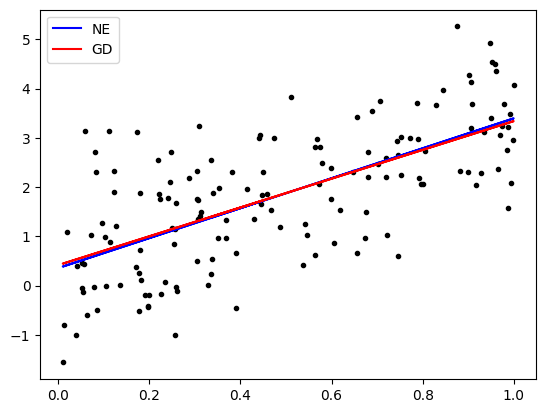

In [47]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()